In [2]:
# Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dtale

/home/juank/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df = pd.read_csv('../dataset/Light Duty Vehicles.csv')

In [4]:
df.head(2)

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD


In [6]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('EDA_LightDutyVehicles.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report EDA_LightDutyVehicles.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
---
(likely due to only having a single row, containing non-NaN values for both correlated features)
Affected correlations:['Fuel ID/PHEV Total Range', 'Model Year/PHEV Total Range', 'PHEV Total Range/Fuel ID', 'PHEV Total Range/Model Year']


In [7]:
df.describe()  # Estadísticas descriptivas de las variables numéricas



,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count,Electric-Only Range,PHEV Total Range
count,3008.00000,3008.000000,2973.000000,3008.000000,3008.000000,3008.000000,1595.000000,1505.000000,467.000000,2044.000000,2046.000000,763.000000,2443.000000,374.000000,43.000000
mean,9424.59242,31.003989,4.907164,255.855718,24.988697,2014.493019,38.439298,37.392651,72.126338,22.781605,27.443206,27.832241,6.085960,148.251337,450.465116
std,4667.98027,18.311570,3.263154,64.474477,6.021677,6.722191,47.778798,42.724296,36.776309,10.794132,10.123663,10.265666,1.762977,128.708353,93.042578
min,1.00000,3.000000,1.000000,209.000000,3.000000,1991.000000,0.000000,0.000000,10.000000,0.000000,0.000000,15.000000,0.000000,8.000000,290.000000
25%,10280.75000,11.000000,1.000000,215.000000,25.000000,2012.000000,11.000000,16.000000,49.000000,16.000000,21.000000,21.000000,4.000000,21.000000,380.000000
50%,11560.50000,41.000000,5.000000,221.000000,27.000000,2016.000000,14.000000,20.000000,74.000000,19.000000,26.000000,24.000000,6.000000,126.000000,460.000000
75%,12336.25000,45.000000,9.000000,243.000000,29.000000,2020.000000,60.000000,41.000000,103.500000,26.000000,31.000000,31.000000,8.000000,254.750000,520.000000
max,13105.00000,57.000000,9.000000,470.000000,29.000000,2022.000000,800.000000,800.000000,142.000000,66.000000,231.000000,59.000000,12.000000,520.000000,640.000000


In [8]:
df.info()  # Información sobre el DataFrame, como tipos de datos, memoria usage, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

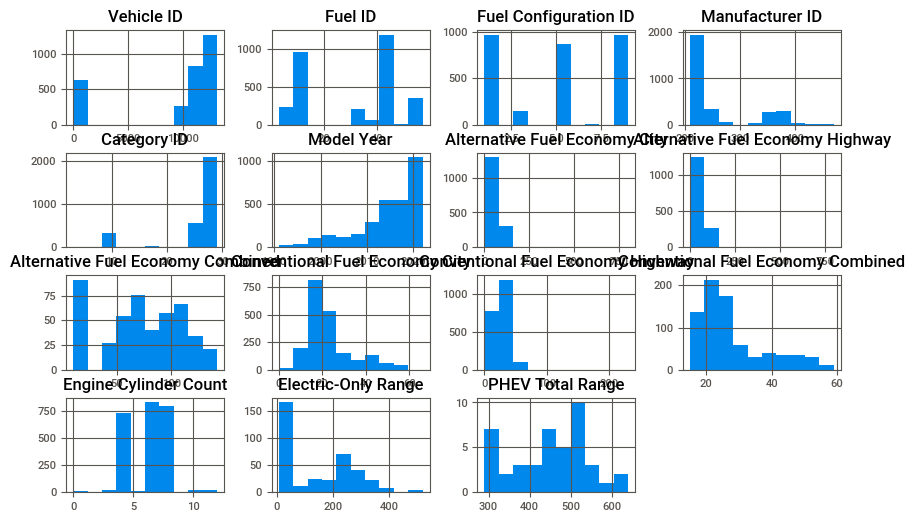

In [9]:
df.hist(figsize=(10, 6))
plt.show()


In [10]:
df.describe(include='all')


,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
count,3008.00000,3008.000000,2973.000000,3008.000000,3008.000000,3008,3008.000000,1595.000000,1505.000000,467.000000,...,2844,3008,3008,3008,2973,374.000000,43.000000,176,73,329
unique,NaN,NaN,NaN,NaN,NaN,1287,NaN,NaN,NaN,NaN,...,42,6,11,11,5,NaN,NaN,2,18,5
top,NaN,NaN,NaN,NaN,NaN,F-150,NaN,NaN,NaN,NaN,...,https://www.ford.com,Sedan/Wagon,E85_GSLN,Ethanol (E85),Hybrid Electric,NaN,NaN,Blended,Ford offers a “prep package” for this vehicle....,AWD
freq,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,...,533,1305,922,922,970,NaN,NaN,159,13,172
mean,9424.59242,31.003989,4.907164,255.855718,24.988697,NaN,2014.493019,38.439298,37.392651,72.126338,...,NaN,NaN,NaN,NaN,NaN,148.251337,450.465116,NaN,NaN,NaN
std,4667.98027,18.311570,3.263154,64.474477,6.021677,NaN,6.722191,47.778798,42.724296,36.776309,...,NaN,NaN,NaN,NaN,NaN,128.708353,93.042578,NaN,NaN,NaN
min,1.00000,3.000000,1.000000,209.000000,3.000000,NaN,1991.000000,0.000000,0.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,8.000000,290.000000,NaN,NaN,NaN
25%,10280.75000,11.000000,1.000000,215.000000,25.000000,NaN,2012.000000,11.000000,16.000000,49.000000,...,NaN,NaN,NaN,NaN,NaN,21.000000,380.000000,NaN,NaN,NaN
50%,11560.50000,41.000000,5.000000,221.000000,27.000000,NaN,2016.000000,14.000000,20.000000,74.000000,...,NaN,NaN,NaN,NaN,NaN,126.000000,460.000000,NaN,NaN,NaN
75%,12336.25000,45.000000,9.000000,243.000000,29.000000,NaN,2020.000000,60.000000,41.000000,103.500000,...,NaN,NaN,NaN,NaN,NaN,254.750000,520.000000,NaN,NaN,NaN


In [11]:
df2=df.select_dtypes(include=['number'])
#media de cada variable numérica.
df2.median()



Vehicle ID                            11560.5
Fuel ID                                  41.0
Fuel Configuration ID                     5.0
Manufacturer ID                         221.0
Category ID                              27.0
Model Year                             2016.0
Alternative Fuel Economy City            14.0
Alternative Fuel Economy Highway         20.0
Alternative Fuel Economy Combined        74.0
Conventional Fuel Economy City           19.0
Conventional Fuel Economy Highway        26.0
Conventional Fuel Economy Combined       24.0
Engine Cylinder Count                     6.0
Electric-Only Range                     126.0
PHEV Total Range                        460.0
dtype: float64

In [12]:
#mediana de cada variable numérica.
df2.median()


Vehicle ID                            11560.5
Fuel ID                                  41.0
Fuel Configuration ID                     5.0
Manufacturer ID                         221.0
Category ID                              27.0
Model Year                             2016.0
Alternative Fuel Economy City            14.0
Alternative Fuel Economy Highway         20.0
Alternative Fuel Economy Combined        74.0
Conventional Fuel Economy City           19.0
Conventional Fuel Economy Highway        26.0
Conventional Fuel Economy Combined       24.0
Engine Cylinder Count                     6.0
Electric-Only Range                     126.0
PHEV Total Range                        460.0
dtype: float64

In [13]:
#moda de cada variable numérica.
df2.mode()


,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count,Electric-Only Range,PHEV Total Range
0,1,11.0,9.0,219.0,27.0,2022.0,11.0,17.0,12.0,14.0,28.0,23.0,6.0,19.0,320.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,13101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,13102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,13103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,13104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#varianza de cada variable numérica.
df2.var()


Vehicle ID                            2.179004e+07
Fuel ID                               3.353136e+02
Fuel Configuration ID                 1.064818e+01
Manufacturer ID                       4.156958e+03
Category ID                           3.626060e+01
Model Year                            4.518785e+01
Alternative Fuel Economy City         2.282814e+03
Alternative Fuel Economy Highway      1.825365e+03
Alternative Fuel Economy Combined     1.352497e+03
Conventional Fuel Economy City        1.165133e+02
Conventional Fuel Economy Highway     1.024886e+02
Conventional Fuel Economy Combined    1.053839e+02
Engine Cylinder Count                 3.108087e+00
Electric-Only Range                   1.656584e+04
PHEV Total Range                      8.656921e+03
dtype: float64

In [15]:
#desviación estándar de cada variable numérica.
df2.std()


Vehicle ID                            4667.980270
Fuel ID                                 18.311570
Fuel Configuration ID                    3.263154
Manufacturer ID                         64.474477
Category ID                              6.021677
Model Year                               6.722191
Alternative Fuel Economy City           47.778798
Alternative Fuel Economy Highway        42.724296
Alternative Fuel Economy Combined       36.776309
Conventional Fuel Economy City          10.794132
Conventional Fuel Economy Highway       10.123663
Conventional Fuel Economy Combined      10.265666
Engine Cylinder Count                    1.762977
Electric-Only Range                    128.708353
PHEV Total Range                        93.042578
dtype: float64

In [16]:
#rango (máximo - mínimo) de cada variable numérica
df2.max() - df2.min()


Vehicle ID                            13104.0
Fuel ID                                  54.0
Fuel Configuration ID                     8.0
Manufacturer ID                         261.0
Category ID                              26.0
Model Year                               31.0
Alternative Fuel Economy City           800.0
Alternative Fuel Economy Highway        800.0
Alternative Fuel Economy Combined       132.0
Conventional Fuel Economy City           66.0
Conventional Fuel Economy Highway       231.0
Conventional Fuel Economy Combined       44.0
Engine Cylinder Count                    12.0
Electric-Only Range                     512.0
PHEV Total Range                        350.0
dtype: float64

In [17]:
#simetría de la distribución de cada variable numérica
df2.skew()


Vehicle ID                           -1.333854
Fuel ID                              -0.224048
Fuel Configuration ID                 0.075197
Manufacturer ID                       1.365735
Category ID                          -2.149866
Model Year                           -1.091589
Alternative Fuel Economy City         5.775716
Alternative Fuel Economy Highway      8.132403
Alternative Fuel Economy Combined    -0.265459
Conventional Fuel Economy City        1.390524
Conventional Fuel Economy Highway     4.580982
Conventional Fuel Economy Combined    1.204951
Engine Cylinder Count                 0.093131
Electric-Only Range                   0.448460
PHEV Total Range                     -0.099186
dtype: float64

In [18]:
#Análisis de variables categóricas
df3=df.select_dtypes(include=['object'])

df3.describe(include='all')

,Model,Transmission Type,Engine Type,Engine Size,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,PHEV Type,Notes,Drivetrain
count,3008,2922,2211,2874,1971,3008,2844,3008,3008,3008,2973,176,73,329
unique,1287,63,115,256,356,55,42,6,11,11,5,2,18,5
top,F-150,Auto,SI,3.0L,3.0L V6,Ford,https://www.ford.com,Sedan/Wagon,E85_GSLN,Ethanol (E85),Hybrid Electric,Blended,Ford offers a “prep package” for this vehicle....,AWD
freq,36,2045,1287,273,206,533,533,1305,922,922,970,159,13,172


In [19]:
# Valores únicos de cada variable categórica
valores_unicos = df3.apply(lambda x: x.unique())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(valores_unicos)

Model                      [NSX, A3 , A3 quattro, A4 allroad quattro, A4 ...
Transmission Type          [Auto, nan, Manual, ECVT, Auto / Man, Automati...
Engine Type                [SI, e-motor, CI, FC, nan, Diesel, Vortec, Ele...
Engine Size                [3.5L, 2.0L, 3.0L, 175 kW electric motor, 141 ...
Engine Description         [3.5L V6, 2.0L I4, 3.0L V6, 2.0L I4;\r\n105 kW...
Manufacturer               [Acura, Audi, Bentley Motors, BMW, Cadillac, C...
Manufacturer URL           [http://www.acura.com/, http://progress.audius...
Category                   [Sedan/Wagon, SUV, Pickup, Van, Passenger Van/...
Fuel Code                  [HYBR, PHEV, ELEC, BD, E85_GSLN, H2, LPG_GSLN,...
Fuel                       [Hybrid Electric, Plug-in Hybrid Electric, Ele...
Fuel Configuration Name    [Hybrid Electric, nan, Dedicated, Flexible Fue...
PHEV Type                                        [nan, Blended, Non-Blended]
Notes                      [nan, Transmission with Sport Mode., This vehi...

In [20]:
# Ajusta la configuración de pandas para mostrar listas completas
pd.set_option('display.max_seq_items', None)

# Itera sobre cada columna e imprime sus valores únicos
for columna in df3.columns:
    print(f"Valores únicos en '{columna}': {df3[columna].unique()}")


Valores únicos en 'Model': ['NSX' 'A3 ' 'A3 quattro' ... 'Lumina FFV' 'Vans'
 'Econoline-Fleet Demo FFV']
Valores únicos en 'Transmission Type': ['Auto' nan 'Manual' 'ECVT' 'Auto / Man' 'Automatic / 6 speed'
 'Semi-Automatic' 'Automatic / 4 speed' 'Automatic' 'Automatic / 1 speed'
 'Automatic / 5 speed' '6 speed Automatic' 'CVT' 'Manual / 6 speed'
 '3 mode / 1 speed' 'Automatic / 7 speed' 'ECVT / 8 speed'
 'Automatic / Variable' 'Automatic / 8 speed' 'Manual / 5 speed'
 '5-Speed Automatic' 'V6, Hybrid, 3.5L' 'Automatic CVT'
 'Continuously Variable' '4-speed automatic' '6-speed automatic'
 'Variable automatic' '5-speed automatic' 'Automatic EVT' 'SOHC'
 'Direct Drive' '7-speed automatic' 'Multispeed automatic'
 '6-speed manual' '4 speed automatic' '5 Speed Automatic'
 '4-speed automatic,' 'Manual 5-Speed or CVT' '5-speed auto with o/d'
 'Automatic (CVT)' 'electronic, 4-speed automatic'
 'electronic 4-speed automatic' '4-speed automatic, overdrive'
 'Single-speed automatic' '4-speed auto

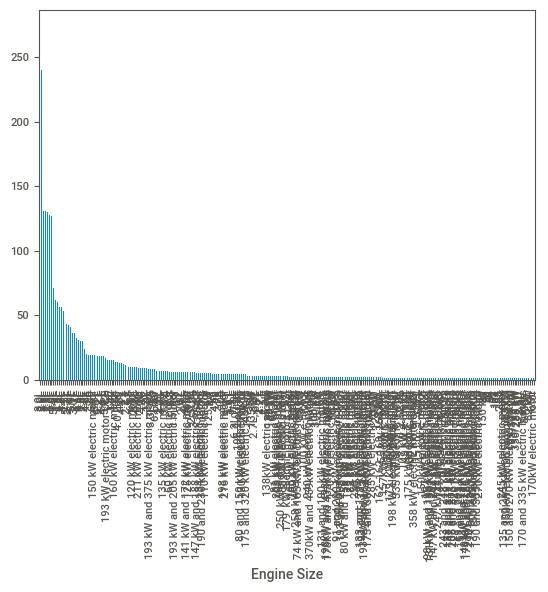

In [22]:
df3['Engine Size'].value_counts().plot(kind='bar')
plt.show()


3008 filas y 29 columnas
Modelos de autos , sus combustibles y sus motores
Tiene aprox la mitad de columnas categoricas y la otra mitad numéricas y 4 de texto.
Relaciona marca de auto (fabrica y marca que lo creo, url de la marca) , tipología de automóvil (modelo, año, categoria), tipos de motores (tipo, tamaño y cilindradas) , tipos de combustibles, también composiciones de combustibles.
Utiliza registros de autos electricos, hibridos y los tradicionales.